In [1]:
#!/usr/bin/env python3
# -*- coding:utf-8 -*-

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## インパルス入力
時間0の時だけ∞の入力．手をたたいた時のような音．  
現実世界ではインパルス入力は使いにくい...**「インパルス入力=余弦波の重ね合わせ」**だと考える！

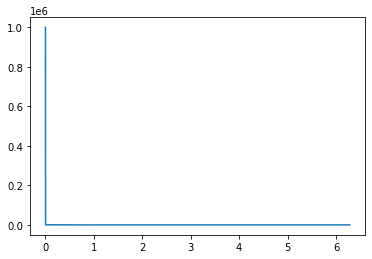

In [23]:
# 時間と周波数
t = np.linspace(0, 2*np.pi, 2000)
_f = np.linspace(0, 10000, 1000000)

y = 0
# 余弦波の重ね合わせ
for f in _f:
    y += np.cos(f*t)
plt.plot(t, y)
plt.show()

\[モデル\]  
入力 = 電圧  ->  システム = モータ  ->  出力 = 各速度

入力を加えて出力を観測する→特徴を調べる

## システムのステップ応答(過渡・定常特性)
電池をつないだ時の出力の振る舞いは？

モデル $ P(s) = \frac{1}{0.5 + 1} = \frac{0s + 1}{0.5s + 1}$

- 伝達関数のモデルの定義: `P = tf([分子の係数][分母の係数])`
- ステップ応答: `y, t = step(モデル, 時間)`
- ステップ応答の情報: `info = stepinfo(モデル)`

In [36]:
from control.matlab import *

In [37]:
# 伝達関数のモデルを定義
P = tf([0, 1], [0.5, 1])
P


    1
---------
0.5 s + 1

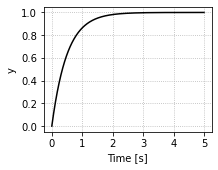

In [39]:
# ステップ応答をプロット
fig, ax = plt.subplots(figsize=(3, 2.3))
y, t = step(P, np.arange(0, 5, 0.01))
ax.plot(t, y, color='k')
ax.set_xticks(np.linspace(0, 5, 6))
ax.set_xlabel('Time [s]')
ax.set_ylabel('y')
ax.grid(ls=':')
plt.show()

In [33]:
# ステップ応答の情報
info = stepinfo(P)
print(info)

{'RiseTime': 1.093093093093093, 'SettlingTime': 1.9374374374374375, 'SettlingMin': 0.8995704003856447, 'SettlingMax': 0.9990881180344618, 'Overshoot': 0.0, 'Undershoot': 0.0, 'Peak': 0.9990881180344618, 'PeakTime': 3.5, 'SteadyStateValue': 0.9990881180344618}


## システムの周波数応答(ゲイン，位相)
電池の+-を交互に切り替えるとどんな振る舞いになるのか？

モデル $ P(s) = \frac{1}{0.5 + 1} = \frac{0s + 1}{0.5s + 1}$

- 周波数応答，ボード線図 `gain, phase, w = bode(モデル, 周波数域)`  
gain: ゲイン \[倍\]，phase: 位相 \[rad\]，w: 周波数 \[rad/s\]

In [28]:
# 係数
K = 1
T = 0.5

In [34]:
# 伝達関数のモデル定義
P = tf([0, K], [T, 1])
P


    1
---------
0.5 s + 1

In [43]:
# ボード線図の作成
gain, phase, w = bode(P, logspace(-2, 2), Plot=False)

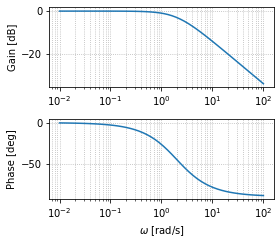

In [45]:
# プロット
fig, ax = plt.subplots(2, 1, figsize=(4, 3.5))

ax[0].semilogx(w, 20 * np.log10(gain))  # dBへの変換
ax[1].semilogx(w, phase * 180 / np.pi)  # degへの変換

ax[0].grid(which='both', ls=':')
ax[0].set_ylabel('Gain [dB]')
ax[1].grid(which='both', ls=':')
ax[1].set_xlabel('$\omega$ [rad/s]')
ax[1].set_ylabel('Phase [deg]')

fig.tight_layout()
plt.show()

## ブロック線図

In [46]:
S1 = tf([0, 1], [0.5, 1])
S1


    1
---------
0.5 s + 1

In [47]:
S2 = tf([83, 3.8], [0.037, 5])
S2


83 s + 3.8
-----------
0.037 s + 5

In [51]:
# 直列結合(S = S1 * S2)
S = series(S1, S2)
S


       83 s + 3.8
------------------------
0.0185 s^2 + 2.537 s + 5

In [52]:
# 並列結合(S = S1 + S2)
S = parallel(S1, S2)
S


41.5 s^2 + 84.94 s + 8.8
------------------------
0.0185 s^2 + 2.537 s + 5

In [53]:
# フィードバック結合(S = S1 / 1 + S1 * S2)
S = feedback(S1, S2, sign=-1)
S


        0.037 s + 5
--------------------------
0.0185 s^2 + 85.54 s + 8.8

In [54]:
# フィードバック(S = S1 * S2 / 1 + S1 * S2)
S = feedback(S1 * S2, 1, sign=-1)
S


        83 s + 3.8
--------------------------
0.0185 s^2 + 85.54 s + 8.8